# **Problem Set 4**

## **Problem 1A**

Using shap, load (a subset of) the California dataset. Using sklearn, train a linear regression and neural network model on the data. Using shap, apply an explainer of your choice to each model and the dataset.

In [ ]:
import sklearn
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap

In [ ]:
# load a subset of data
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

feature_names = X.columns

print("Num samples and features: ", X.shape)
print("Num of labels: ", y.shape)

Num samples and features:  (20640, 8)
Num of labels:  (20640,)


In [ ]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
# Good idea to normalize X to certain range
X_scaled = StandardScaler().fit_transform(X)

In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# our linear model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Now for the MLP
MLP_model = MLPRegressor(random_state=1, max_iter=500)
MLP_model.fit(X_train, y_train)

MLPRegressor(max_iter=500, random_state=1)

In [ ]:
# assess performance on each model (SANITY CHECK BEFORE I ACTUALLY USE SHAP)
y_pred_regr = regression_model.predict(X_test)
y_pred_MLP = MLP_model.predict(X_test)

MSE_regr = mean_squared_error(y_test, y_pred_regr)
print("MSE for Linear Regression: ", MSE_regr)

MSE_MLP = mean_squared_error(y_test, y_pred_MLP)
print("MSE for MLP Regression: ", MSE_MLP)

MSE for Linear Regression:  0.555891598695244
MSE for MLP Regression:  0.282399623314305


In [ ]:
# apply kernel shap for linear model
background_sample = shap.sample(X_train, 100)

In [ ]:
explainer_regr = shap.KernelExplainer(regression_model.predict, background_sample, feature_names=feature_names)
shap_values_regr = explainer_regr(X_test)

  0%|          | 0/4128 [00:00<?, ?it/s]

In [ ]:
# and for MLP
explainer_MLP = shap.KernelExplainer(MLP_model.predict, background_sample, feature_names=feature_names)
shap_values_MLP = explainer_MLP(X_test)

  0%|          | 0/4128 [00:00<?, ?it/s]

## **Problem 1B**

For the same observation in the dataset, make a waterfall plot with the Shapley values for both models. What do you notice?


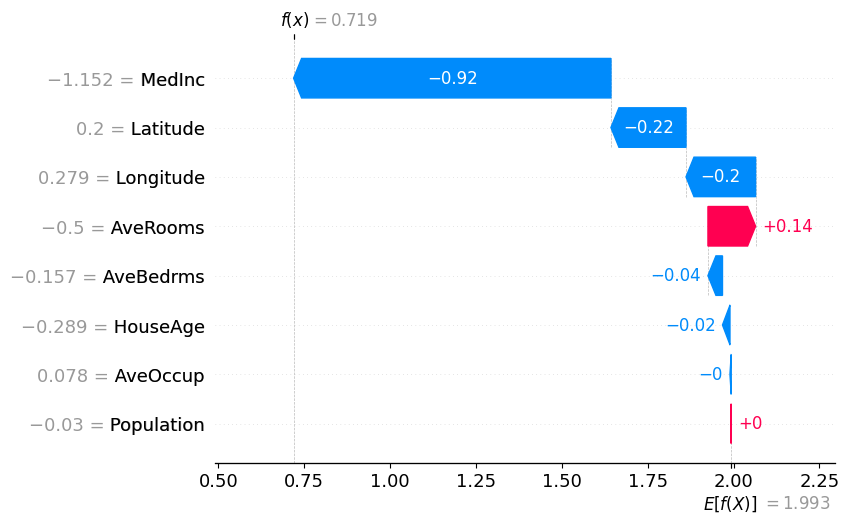

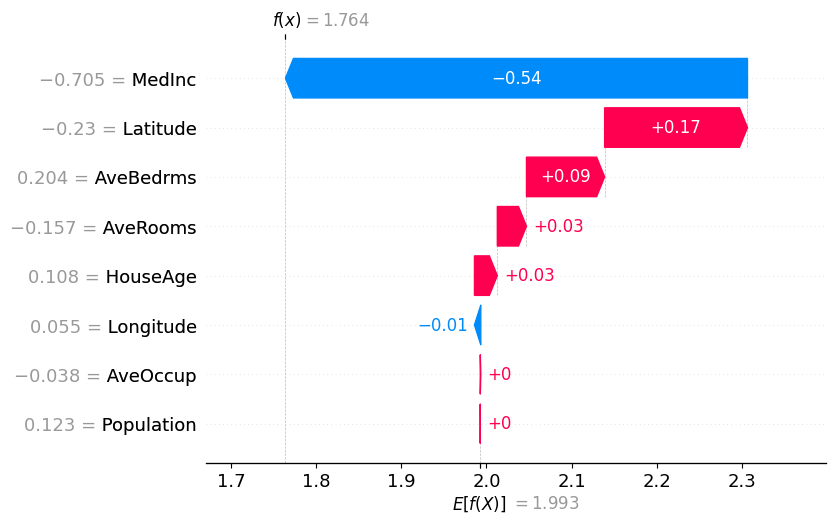

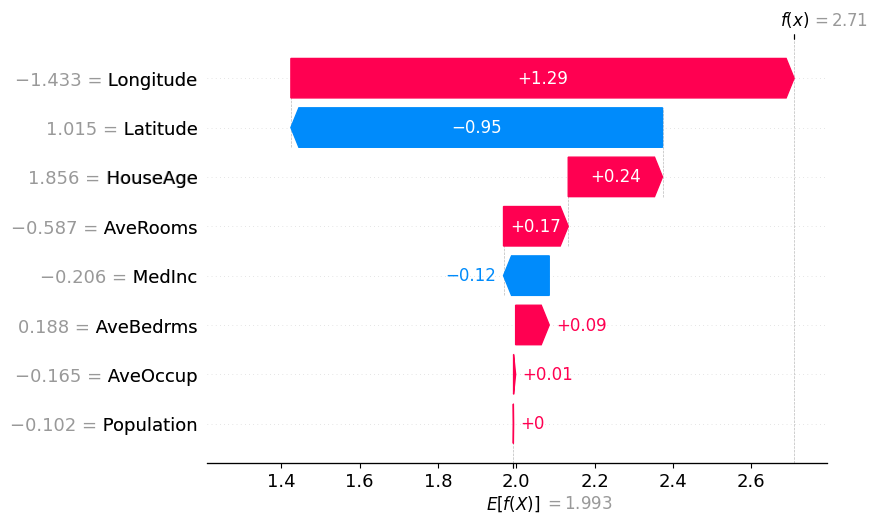

In [ ]:
# plot for linear regression for a few examples
shap.plots.waterfall(shap_values_regr[0])
shap.plots.waterfall(shap_values_regr[1])
shap.plots.waterfall(shap_values_regr[2])

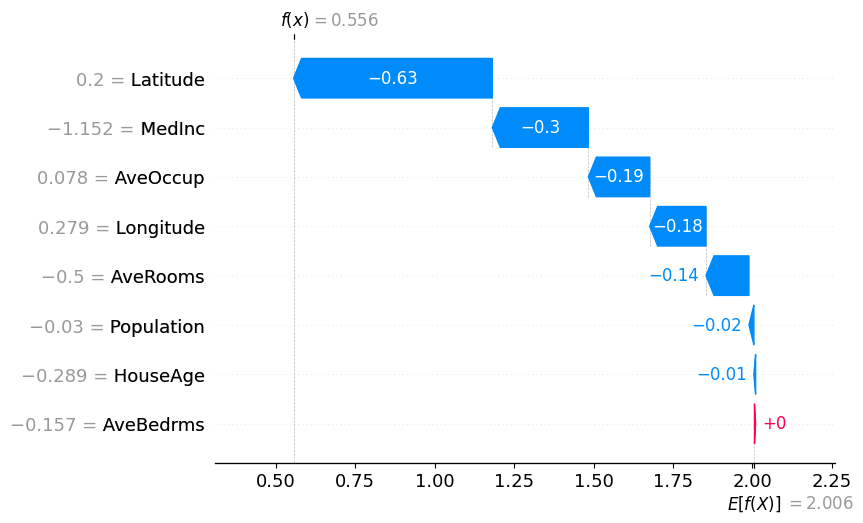

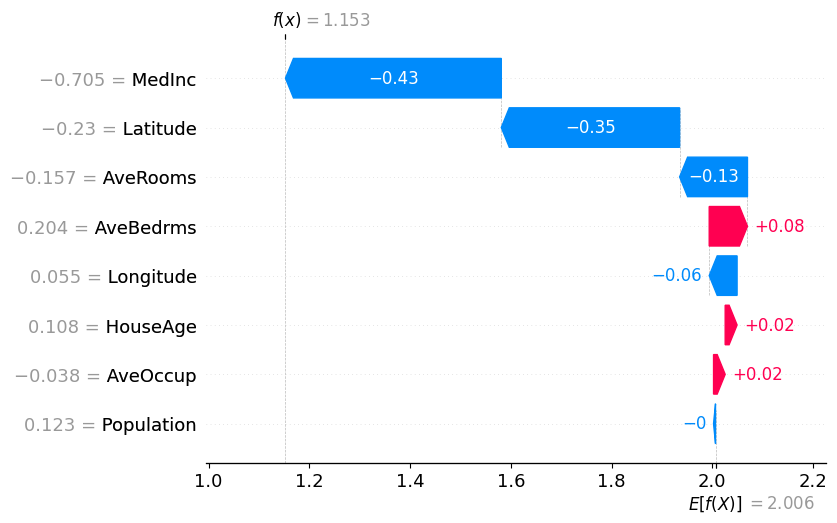

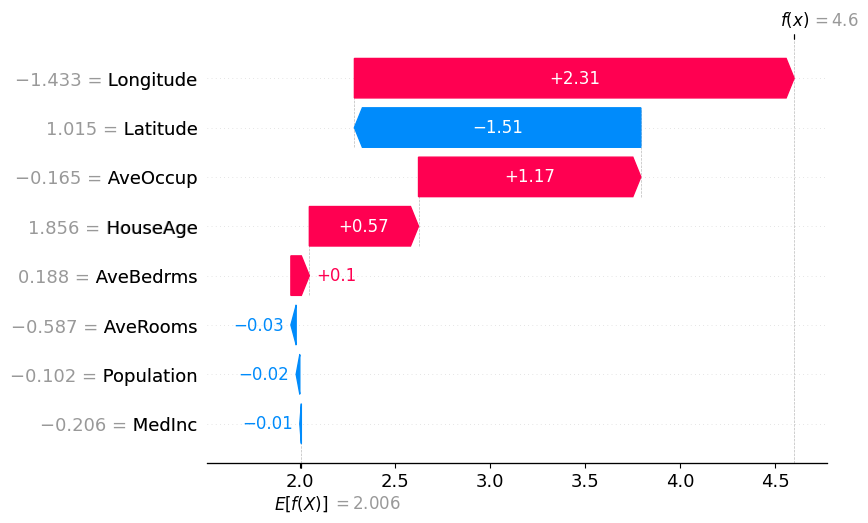

In [ ]:
# plot for MLP for a few examples
shap.plots.waterfall(shap_values_MLP[0])
shap.plots.waterfall(shap_values_MLP[1])
shap.plots.waterfall(shap_values_MLP[2])

It appears that in either model, though the linear model to a greater degree, median income and location have the greatest sway on the model prediction. Interestingly, average number of rooms and bedrooms seems to have a lesser effect (lower Shapely value) than what I would have expected. I would surmise that this would have to do with California's general tendency toward ridiculous prices on even the smallest of homes, depending on the location. In certain cases where average occupancy is less (higher Shapely contribution), with a more valuable location (generally higher Shapely value), house age can slightly improve the estimation of home value (also a higher Shapely value).

## **Problem 1C**

Make a beeswarm plot with the Shapley values for both models. What do you notice?

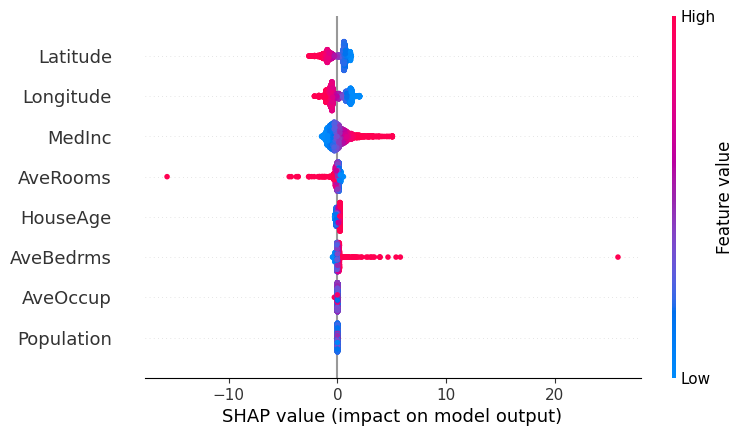

In [ ]:
# beeswarm for linear model
shap.plots.beeswarm(shap_values_regr)

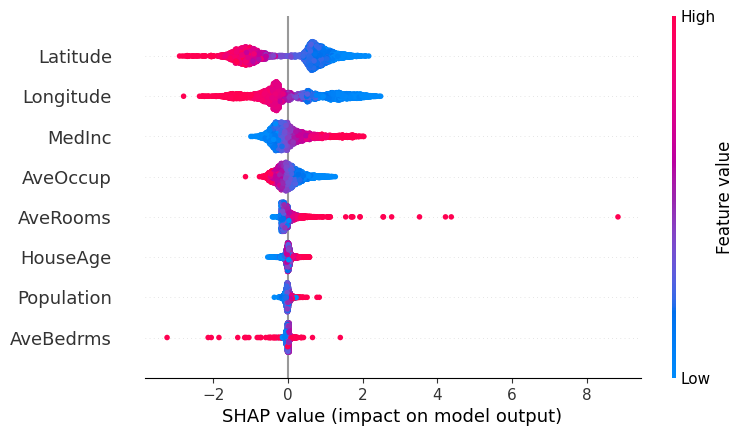

In [ ]:
# beeswarm for MLP model
shap.plots.beeswarm(shap_values_MLP)

As was previously observed in the waterfall plots, latitute and longitude have the largest impact on the Shapely value and consequently on model output. Obviously lower lattitude and longitudes (closer to California coast) generally increase our model's tendency toward estimating a higher price. High income has a positive impact on model output and to a lesser extent, as does lower average occupancy. Interestingly, there are some extreme outliers in average rooms and average bedrooms. I would guess that for properties with an extremely good location (and higher price), they tend to have fewer rooms due to the urban population density. However, for properties with an extremely good location and a high number of rooms, the property value skyrockets.

In [ ]:
# example predictions
y_pred = regression_model.predict(X_test)
y_pred_MLP = MLP_model.predict(X_test)

diff_y = y_test - y_pred
diff_y_MLP = y_test - y_pred_MLP

print(diff_y[:10])
print(diff_y_MLP[:10])

20046   -0.242123
3024    -1.306017
15663    2.290351
20484   -0.652926
9814     0.175343
13311   -0.424754
7113    -0.663500
7668    -0.593755
18246    0.659254
5723     0.550385
Name: MedHouseVal, dtype: float64
20046   -0.078752
3024    -0.694680
15663    0.399766
20484   -0.329725
9814    -0.032148
13311   -0.033510
7113    -0.429802
7668    -0.067334
18246    0.925857
5723    -0.023245
Name: MedHouseVal, dtype: float64
